In [43]:
import numpy as np
import pandas as pd

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


In [44]:
region_footprint = pd.read_csv("../outputs/stats_region_footprint.tsv", sep="\t")

In [160]:
def plot_region_footprint(df, ax, region="transcript", legend=False, xlabel=False):

    df = df.query(f"region == '{region}'")

    colors = {"constrained": C.red, "unconstrained": C.grey, "indeterminate": C.black}
    labels = {
        "transcript": "Transcript",
        "nmd_target": "NMD Target",
        "long_exon": "Long Exon",
        "distal_nmd": "Distal",
        "start_proximal": "Start Proximal",
    }

    n = len(df)
    y = np.arange(n)
    x = df["size"]

    b = ax.barh(
        y=y * 1 / n,
        height=1 / (n + 1),
        width=x,
        label=df["constraint"].str.capitalize(),
        color=df["constraint"].map(colors),
    )
    ax.bar_label(b, fmt="{:,.0f}", padding=7)

    ax.set_yticks(ticks=[y.max() / (2 * n)], labels=[labels[region]],)
    ax.tick_params(axis="y", length=0, pad=7)
    
    if xlabel: ax.set_xlabel("Genomic Footprint (nt)")

    if legend:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], labelspacing=1, loc="center right", handleheight=n/2)

    return None

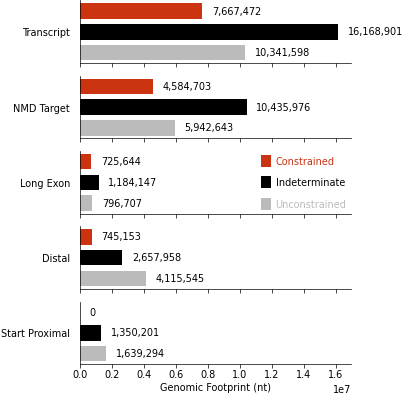

In [161]:
cm = 1 / 2.54
fig, axs = plt.subplots(5, 1, figsize=(8.9 * cm, 12 * cm), sharex=True)

plot_region_footprint(region_footprint, axs[0], "transcript")
plot_region_footprint(region_footprint, axs[1], "nmd_target",)
plot_region_footprint(region_footprint, axs[2], "long_exon", legend=True)
plot_region_footprint(region_footprint, axs[3], "distal_nmd")
plot_region_footprint(region_footprint, axs[4], "start_proximal", xlabel=True)